In [1]:
import numpy as np
import ray
import ray.rllib

import q1physrl.env

/home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
ray.init()

2020-01-28 09:20:00,238	WARNING worker.py:673 -- WARNING: Not updating worker name since `setproctitle` is not installed. Install this with `pip install setproctitle` (or ray[debug]) to enable monitoring of worker processes.
2020-01-28 09:20:00,241	WARNING services.py:597 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2020-01-28 09:20:00,280	INFO resource_spec.py:216 -- Starting Ray with 0.93 GiB memory available for workers and up to 0.49 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-01-28 09:20:00,623	WARNING services.py:1009 -- Failed to start the reporter. The reporter requires 'pip install psutil'.


{'node_ip_address': '10.120.1.181',
 'redis_address': '10.120.1.181:48521',
 'object_store_address': '/tmp/ray/session_2020-01-28_09-20-00_240542_19530/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-01-28_09-20-00_240542_19530/sockets/raylet',
 'webui_url': None,
 'session_dir': '/tmp/ray/session_2020-01-28_09-20-00_240542_19530'}

In [3]:
trainer = ray.rllib.agents.a3c.A2CTrainer(
    env=q1physrl.env.PhysEnv,
    config={"env_config": {"num_envs": 100}, "gamma": 0.9}
)

2020-01-28 09:20:00,825	INFO trainer.py:371 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2020-01-28 09:20:00,859	INFO trainer.py:512 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2020-01-28 09:20:02,794	WARNING util.py:45 -- Install gputil for GPU system monitoring.
2020-01-28 09:20:02,795	WARNING util.py:48 -- Install psutil to monitor system performance.


In [4]:
while True:
    print(trainer.train()['episode_reward_mean'])

(pid=19574) /home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
(pid=19574)   warnings.warn(msg)
(pid=19571) /home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
(pid=19571)   warnings.warn(msg)
(pid=19574) /home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
(pid=19574)   warnings.warn(msg)
(pid=19571) /home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma modu

KeyboardInterrupt: 

In [ ]:
trainer.save()

In [5]:
trainer.restore('/home/matt/ray_results/A2C_PhysEnv_2020-01-27_21-54-210mybah6w/checkpoint_38/checkpoint-38')

2020-01-28 09:36:41,638	INFO trainable.py:346 -- Restored from checkpoint: /home/matt/ray_results/A2C_PhysEnv_2020-01-27_21-54-210mybah6w/checkpoint_38/checkpoint-38
2020-01-28 09:36:41,639	INFO trainable.py:353 -- Current state after restoring: {'_iteration': 38, '_timesteps_total': 1644200, '_time_total': 387.99199175834656, '_episodes_total': 4600}


In [6]:
env = q1physrl.env.PhysEnv({'num_envs': 1})
obs = env.vector_reset()
done = None

action_list = []
obs_list = []
rewards_list = []

while done is None or not done[0]:
    obs_list.append(obs)
    action = trainer.compute_action(obs[0])
    action_list.append(action)
    obs, reward, done, _ = env.vector_step(action[None])
    rewards_list.append(reward)
    
actions = np.array(action_list)
obss = np.array(obs_list)
rewards = np.array(rewards_list)

/home/matt/100m-rl/q1physrl/phys.py:89: RuntimeWarning: invalid value encountered in true_divide
  return np.where((speed > 0)[:, None], h_vel * (new_speed / speed)[:, None], h_vel)


In [7]:
import pandas as pd
pd.DataFrame({'observed yaw': obss[:, 0, 0], 'yaw action': actions[:, 0]})

,observed yaw,yaw action
0,90.00,0
1,84.96,0
2,79.92,2
3,84.96,0
4,79.92,0
...,...,...
353,90.00,0
354,84.96,0
355,79.92,2
356,84.96,2


In [12]:
obss[0]

array([[90.  , 32.75,  0.  ,  0.  ,  0.  ]])

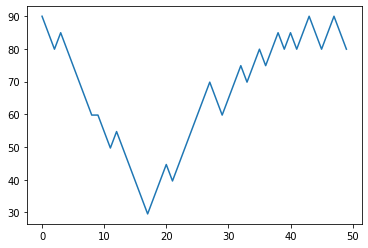

In [13]:
import matplotlib.pyplot as plt

plt.plot(obss[:50, 0, 0])

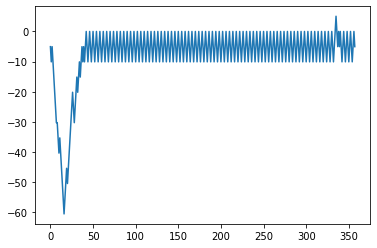

In [10]:
plt.plot((actions[:, 0] - 1).cumsum() * 0.014 * 360)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(actions[:36, 0])

In [ ]:
actions[:, 0].mean()